# Chemical Kinetics
## Luis Itza Vazquez-Salazar, Silvan Käeser and Markus Meuwly
email: luisitza.vazquezsalazar@unibas.ch

### Index
0. Introduction
1. Simple Kinetics
    * First and second order reactions
    * Reversible reactions
2. Enzyme Kinetics
   * Introduction
   * Michaelis-Menten Model
3. More complex reactions
   * Introduction
   * Oscillating reactions 
   * Belousov-Zhabotinskii reaction
4. Bibliography


## 0. Introduction

Chemical kinetics refeers to a whole branch of chemistry dedicated to understand how fast chemical reactions happens. In other words, how fast a reactant transforms into a product. 

Let us take the general case of a chemical reaction:

\begin{equation}
 \nu_{a}A + \nu_{b}B + \cdots \ \rightarrow \nu_{x}X + \nu_{y}Y + \cdots \tag{1} 
\end{equation}

In equation 1, $\nu_{i}$ is the stechiometric coefficient of the correspondent reactant or product. 

With this expression on mind, we can say that one of the main missions of chemical kinetics is to study how fast products appear and how fast reactants dissappear. 

Then, we can define ***the reaction rate*** as the change in concentration of a given specie *i* on time. This is:

\begin{equation}
  r= \frac{1}{\nu_{i}} \frac{dC_{i}}{dt} \tag{2}
\end{equation}

where $C_{i}$ is the concetration of an *i* specie, $\nu_{i}$ is the stechiometric coefficient of the *i* specie.

We also known that the change in concentration of one reactant is determined by it's interactions with the other reactants on the reaction. In other words, the reaction rate is dependent on the concentration of the reagents. This is know as ***the law of mass action*** and it is expressed as:

\begin{equation}
 r=k\prod_{i}C_{i}^{n_{i}} \tag{3}
\end{equation}

In equation 3, *k* is the rate constant and $C_{i}$ is the concentration of an *i* specie. The number $n_{i}$ is the order of the reaction and should be obtained experimentally. 


## 1. Simple kinetics
### First and second order kinetics

Once we are familiar with the concepts of chemical kinetcs, we can start solving problems of chemical kinetics.

Suppose a reaction of the type:
 $$ A \rightarrow B $$
 This reaction has a rate law on the form in the case of a first order kinetics:
 $$ r = k C_{a} = -\frac{dC_{a}}{dt} $$
We will assume that when $t=0$ then $C_{a}=C_{a}^{0}$. 

So, we will solve this problem using SymPy and Numpy

**Note**: $C_{a}=[A]$ 

In [3]:
import numpy as np
import sympy as sym
from sympy import *

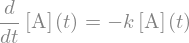

In [4]:
sym.init_printing() #This prints the functions
k, t = sym.symbols('k t') #This defines the symbols 
A = sym.Function('[A]') #This start the function of the concentration
dAdt = A(t).diff(t) #This start the derivative of the concentration with respect to the time
expr = sym.Eq(dAdt, -k*A(t)) #This defines the equation to solve
expr #This prints the expresion to solve

In [5]:
A0 = sym.symbols('[A]_{0}') #This is the initial condition. 
sol_1orden = sym.dsolve(expr, ics={A(0):A0}) #This solve the differential equation given a initial condition.
sol_1orden

Now that we have the complete solution it is possible to graph the solution that we obtained. We need to give the initial concentration of specie A and the value of constant *k*. 
- Could you plot how the concentration of specie B changes as a function of time?

In [6]:
Ainit = 1 #Inital concentration of reactant A
kreact = 0.02 #Reaction constant
sol_1order_init = sol_1orden.subs({A0:Ainit, k:kreact})
data = np.linspace(0,1000,100)
f_A_1order = sym.lambdify(t, sol_1order_init.rhs, 'numpy')
F_A_1order = f_A_1order(data)

Text(0, 0.5, 'Concentration')

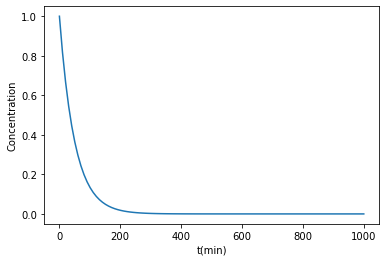

In [7]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data,F_A_1order, label='A')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')


#### Solution
Assuming that the initial concentration of A is equal to:
$$[A]_{0}=[A]+[B]$$
From the solution, we know that $[A] = [A]_{0} e^{-kt}$. Then, subtituying we obtain:
$$[B]=[A]_{0}(1-e^{-kt})$$
which we can plot.

In [8]:
B = Ainit - sol_1order_init.rhs
f_B_1order = lambdify(t,B, "numpy")
F_B_1order = f_B_1order(data)

Text(0, 0.5, 'Concentration')

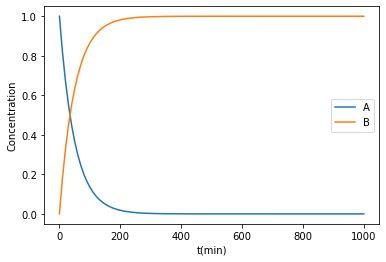

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data,F_A_1order, label='A')
ax1.plot(data,F_B_1order, label='B')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')


Now that we solved the simplest case. It is easy to extend to more complicated case. 
Assume a system which follows a second-order rate law of the type:
 $$ r = k C_{a}^{2} = -\frac{dC_{a}}{dt} $$
 - Could you integrate this equation using sympy and then plot how the products and reactants behave on time?

#### Solution

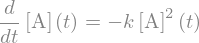

In [10]:
k, t = sym.symbols('k t') #This defines the symbols 
A = sym.Function('[A]') #This start the function of the concentration
dAdt = A(t).diff(t) #This start the derivative of the concentration with respect to the time
expr_2order = sym.Eq(dAdt, -k*(A(t))**2) #This defines the equation to solve
expr_2order #This prints the expresion to solve

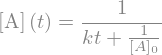

In [11]:
A0 = sym.symbols('[A]_{0}') #This is the initial condition. 
sol_2order = sym.dsolve(expr_2order, ics={A(0):A0}) #This solve the differential equation given a initial condition.
sol_2order

In [25]:
Ainit2 = 1
kreac_2order = 0.02
sol_2order_init = sol_2order.subs({A0:Ainit2, k:kreac_2order})
data = np.linspace(0,1000,100)
f_A_2order = sym.lambdify(t, sol_2order_init.rhs, 'numpy')
F_A_2order = f_A_2order(data)

Text(0, 0.5, 'Concentration')

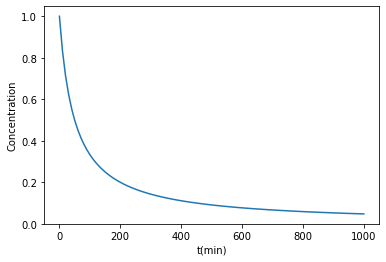

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data,F_A_2order, label='A')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

In [27]:
B = Ainit2 - sol_2order_init.rhs
f_B_2order = lambdify(t,B, "numpy")
F_B_2order = f_B_2order(data)

Text(0, 0.5, 'Concentration')

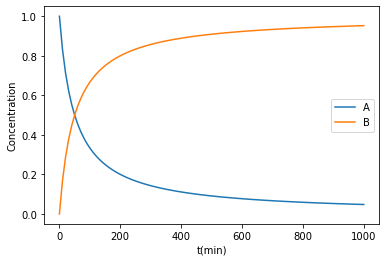

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data,F_A_2order, label='A')
ax1.plot(data,F_B_2order, label='B')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')


Lets compare the graph of the change in the concentration of reactants and products in time for the first and second order. 

Text(0, 0.5, 'Concentration')

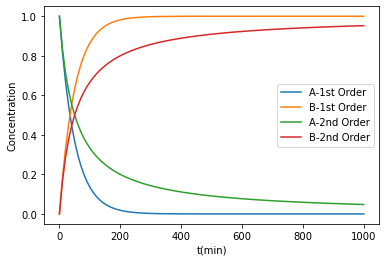

In [16]:
#Lets compare the graph for first and second order
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data,F_A_1order, label='A-1st Order')
ax1.plot(data,F_B_1order, label='B-1st Order')
ax1.plot(data,F_A_2order, label='A-2nd Order')
ax1.plot(data,F_B_2order, label='B-2nd Order')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')


#### Exercise

Assume a reaction of the type:

$$ A + B \rightarrow C $$

Which is governated by the kinetic equation:

$$ r = -\frac{d[A]}{dt} = -\frac{d[B]}{dt} = k[A][B] $$
Using SciPy derive the general solution for this type of reaction and obtain the plots for the change of concentration for the reactants and products.

Terminar!

### Reversible reactions

In chemistry most of the reactions studied are reversible, this means that there is an additional mechanism which gives place to a return of the products to the reactants. 

We will consider the simplest case of a first-order reaction. Lets consider a reaction of the type:

$$ A \rightleftharpoons B $$

The rate of this reaction can be expressed as:

$$ r = -\frac{d[A]}{dt} = k_{f}[A] - k_{r}[B] $$

$$ r = - \frac{d[B]}{dt} = k_{r}[B] - k_{f}[A] $$

Where $k_{f}$ is the reaction constant for the forward reaction and $k_{r}$ is the reaction constant for the reverse reaction. 

We can write the law of conservation of mass for this system as:

$$ [A]_{0} + [B]_{0} = [A] + [B] $$

Here $[i]_{0}$ is the initial concentration of the $i$ specie ($i = A,B$)  on the reaction. Then, it is possible to expression the equation for the rate of A or B in terms of one variable. 

In this case, we will obtain the concentration of B as a function of the concentration of A.

$$ [B] = [A]_{0} + [B]_{0} - [A] $$

Then, we substitute this on the equation for the rate of A and we obtain:

$$ r = -\frac{d[A]}{dt} = (k_{f} + k_{r}) \left\{ [A]-\frac{k_{r}([A]_{0}+[B]_{0})}{(k_{f}+k_{r})}  \right\} $$

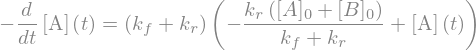

In [80]:
kr, kf, t = sym.symbols('k_{r} k_{f} t') 
A0 = sym.symbols('[A]_{0}') 
B0 = sym.symbols('[B]_{0}')
A = sym.Function('[A]') 
dAdt = A(t).diff(t)
kt = kr + kf
m = (kr*(A0+B0))/kt
expr_1order_rev = sym.Eq(-dAdt, kt*(A(t)-m)) #This defines the equation to solve
expr_1order_rev #This prints the expresion to solve

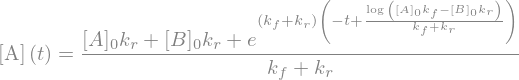

In [81]:
sol_1order_rev = sym.dsolve(expr_1order_rev, ics={A(0):A0}) #This solve the differential equation given a initial condition.
sol_1order_rev

In [104]:
A0_rev=1.0
B0_rev=0.2
kfor=0.45
krev=0.45
sol_1order_rev_init = sol_1order_rev.subs({A0:A0_rev, B0:B0_rev, kr:krev, kf:kfor})
sol_1order_rev_init

In [107]:
data = np.linspace(0,10,100)
f_A_1order_rev = sym.lambdify(t, sol_1order_rev_init.rhs, 'numpy')
F_A_1order_rev = f_A_1order_rev(data)
F_B_1order_rev = A0_rev + B0_rev - f_A_1order_rev(data)

Text(0, 0.5, 'Concentration')

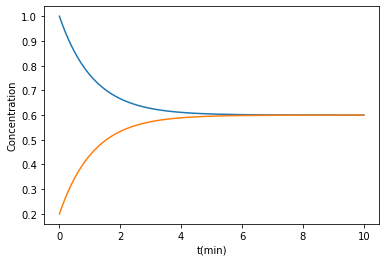

In [108]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data, F_A_1order_rev, label='A')
ax1.plot(data,F_B_1order_rev, label='B')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

#### Exercise
Let's consider a reversible bimolecular transformation of second order which can be expressed as:

$$ A + B \rightleftharpoons C + D $$

Obtain the solution for the concentration of all the species on the reaction and plot the evolution on time of them.

##### Hint:
The differential equation that describes the system is:

$$ r = -\frac{d[A]}{dt} = k_{f}[A][B] - k_{r}[C][D] $$

## 2. Enzyme kinetics.
### Introduction
One of the most interesting applications of chemical kinetics is on the study of enzymes. As you might know, enzymes are fundamental components for the develop of chemical reactions on live systems. Enzymes acts as catalysts on chemical reactions this means that its presence can increase or reduce the rate of a reaction. 

The study of enzyme kinetics requires the use of the concepts that we learn on the previous module. We will derive, using SymPy, the well known model of Michaelis-Menten. This is name after the German biochemist Leonor Michaelis and Canadian physician Maud Menten. 

### Michaelis-Menten Model
Let's consider the the rate of hydrolysis of sucrose to glucose and fructose catalysed by the yeast enzyme $\beta$-fructofuranosidase, this process was studied in 1902 by [Brown](https://doi.org/10.1039/CT9028100373). This process have the following mechanism.

$$ E + S \rightleftharpoons ES \rightarrow P + E $$

On this reaction, $E$ is the enzyme, $S$ is the substrate, $ES$ is the complex enzyme-substrate and $P$ is the final product.
The previous reaction can be graphically represented as:
![Model for the behaviour of an enzymatic reaction. Adapted from Ancheyta Juarez, 2017](Enzyme.png) 

It is obvious that we have a system which contains a reversible reaction and then a second reaction that transforms the complex enzyme-substrate into the final product. So, mathematically speaking we can fomulate this as:
\begin{equation}
\frac{d[S]}{dt} = -k_{f}[E][S] + k_{r}[ES] \tag{1}
\end{equation}
\begin{equation}
 \frac{d[E]}{dt} = -k_{f}[E][S] + k_{f} [ES] + k_{cat}[ES] \tag{2}
\end{equation}
\begin{equation}
\frac{d[ES]}{dt} = k_{f}[E][S] - k_{r}[ES] - k_{cat}[ES] \tag{3}
\end{equation}
\begin{equation}
\frac{d[P]}{dt} = k_{cat}[ES] \tag{4}
\end{equation}

To solve this system of differential equations, we need to have few initial conditions for each of the species. This initials conditions are:

$$ [S](t=0)=[S]_{0} \quad  [E](t=0)=[E]_{0} \quad [ES](t=0)=0 \quad [P](t=0)=0 $$

We want to simplify a bit the system of differential equation make its solution easy. So, we notice that equation 4 is uncoupled form the other 3, then its solution can be expressed as:

\begin{equation}
[P](t) = k_{cat} \int_{0}^{t} [ES](t') dt' \tag{5}
\end{equation}

Equation 5, only depend on the analytical form of $[ES]$ which can be obtained from equations 1,2 and 3. 

We can simplify more our systems of equations by looking at the concentration of the enzyme. We known that the total concentration is constant through the process, this means that the sum of the free enzyme and the enzyme on the complex with the substrate is equal to a constant. Then, we can add equations 2 and 3 to obtain 

$$ \frac{d[E]}{dt}+\frac{d[ES]}{dt} = 0 \quad \Longrightarrow \quad [E](t)+[ES](t) = [E]_{0} $$

Using the initial conditions previously defined we reduces the original system of equations to:

\begin{equation}
\frac{d[S]}{dt} = -k_{f}[E]_{0}[S] + (k_{f}[S] + k_{r})[ES] \tag{6}
\end{equation}
\begin{equation}
\frac{d[ES]}{dt} = k_{f}[E]_{0}[S] - (k_{r} + k{f} + k_{cat})[ES] \tag{7}
\end{equation}

We will solve this system of equation subject to the initial conditions previously given. 

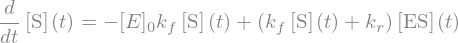

In [119]:
kr, kf, kcat, t = sym.symbols('k_{r} k_{f} k_{cat} t') 
S0 = sym.symbols('[S]_{0}') 
E0 = sym.symbols('[E]_{0}')
S = sym.Function('[S]')
E = sym.Function('[E]')
ES = sym.Function('[ES]')
dSdt = S(t).diff(t)
dESdt = ES(t).diff(t)
eq1_mm = sym.Eq(dSdt, -kf*E0*S(t)+(kf*S(t)+ kr)*ES(t))
eq2_mm = sym.Eq(dESdt, kf*E0*S(t)-(kr+kf+kcat)*ES(t))
eq1_mm

In [ ]:
sol_mm = sym.dsolve((eq1_mm, eq2_mm), ics={S(0):S0, ES(0):0}) #This solve the differential equation given a initial condition.
sol_mm